In [1295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [1296]:
train=pd.read_csv(r"C:\Users\USER\Desktop\캐글 모델링\boston house\data\train.csv", index_col='Id')
test=pd.read_csv(r"C:\Users\USER\Desktop\캐글 모델링\boston house\data\test.csv", index_col='Id')

In [1297]:
# data=train
# #pd.concat([train,test], sort=False)

In [1298]:
# 프로파일 및 eda 목적용 데이터 프레임
data=pd.concat([train, test], sort=False)

In [1299]:
# data description에 안나와있는 특성 삭제
data.drop(columns=['KitchenAbvGr'], inplace=True)
data.drop(columns=['BedroomAbvGr'], inplace=True)

In [1300]:
len(data.columns)

78

## 1. 타겟변수 확인

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

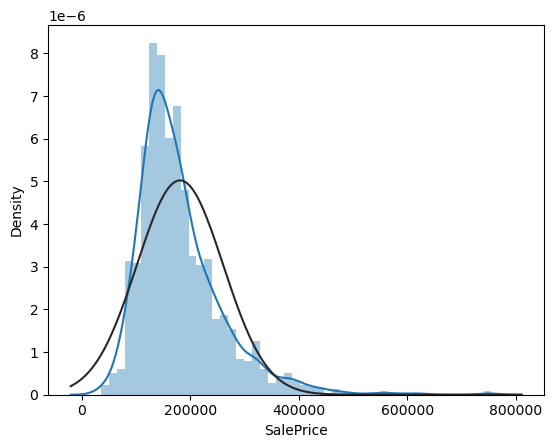

In [1301]:
from scipy import stats
from scipy.stats import norm

# distplot : 연속형 데이터의 분포를 보여주는 함수
# fit = norm -> "이 데이터가 정규분포를 따를때의 모습을 보여줌"
# => 정규분포하는지 아닌지 판단 
sns.distplot(train['SalePrice'],fit = norm)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

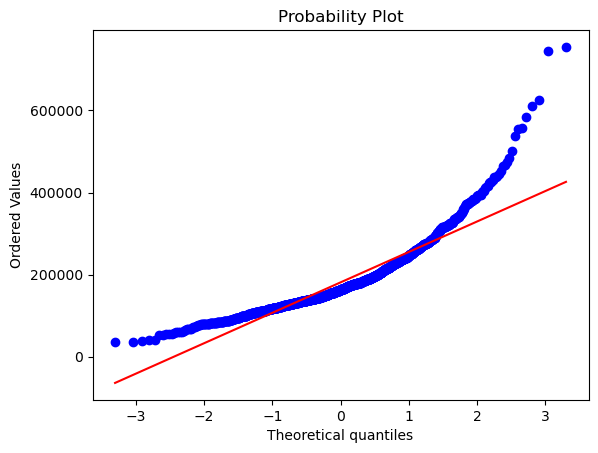

In [1302]:
#stats.probplot은 probability plot(확률그림)을 뜻함
# 빨간선이 이론적인 정규분포의 분위수
# 파란색이 현재 데이터의 분위수
# 두 선이 일치할 수록 정규분포를 따름
stats.probplot(train['SalePrice'], plot=plt)

-> 타겟변수인 SalePrice 정규화 필요

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

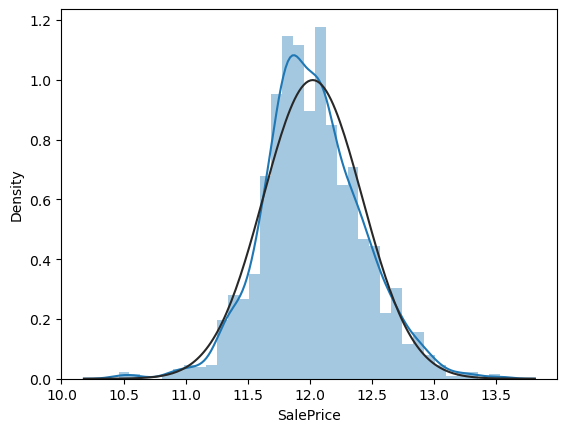

In [1303]:
#log가 아닌 log1p를 하는 이유
#만약 x=0의 값이 있다면 y=-inf가 되기때문에
#log(1+값)을 해주는 것 : log1p
train['SalePrice'] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'],fit=norm)

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.39825964665415103, 12.024057394918403, 0.9953761551826703))

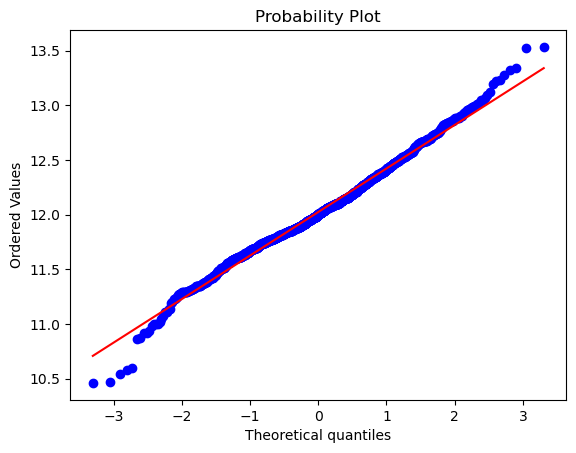

In [1304]:
stats.probplot(train['SalePrice'], plot=plt)